In [1]:
# Import Libraries
# Explanation: Import required libraries for data handling and visualization
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import numpy as np


In [2]:
# Load Dataset
# Explanation: Read the Garmin run session data
df = pd.read_csv("Garmin_run_data.csv")
df.head()


,Activity Type,Date,Title,Distance,Calories,Time,Avg HR,Max HR,Avg Run Cadence,Max Run Cadence,Avg Pace,Best Pace,Elev Gain,Elev Loss,Avg Stride Length,Best Lap Time,Number of Laps
0,Running,7/15/20 9:41,Cherry Hill Running,6.00,530,0:43:55,141,160,176,182,7:19,6:20,169,173,1.26,00:02.3,7
1,Running,7/14/20 17:45,Cherry Hill Running,6.50,587,0:47:04,144,160,172,182,7:14,6:35,183,187,1.29,03:32.7,7
2,Running,7/13/20 18:57,Cherry Hill Running,5.01,392,0:40:29,128,151,170,180,8:05,5:49,124,124,1.17,00:04.1,6
3,Running,7/12/20 18:44,Cherry Hill Running,7.01,633,0:52:55,142,157,172,180,7:33,5:00,215,219,1.24,00:05.1,8
4,Running,7/11/20 19:35,Cherry Hill Running,5.19,419,0:41:35,129,143,170,178,8:01,6:48,76,80,1.18,01:27.1,6


In [3]:
# Convert time to total minutes
# Explanation: Convert HH:MM:SS or MM:SS time strings to float values (minutes)
def convert_to_minutes(time_str):
    try:
        time_str = re.sub(r'\.\d+', '', time_str)  # Remove decimals
        parts = time_str.strip().split(':')
        parts = list(map(int, parts))
        if len(parts) == 3:
            return parts[0] * 60 + parts[1] + parts[2] / 60
        elif len(parts) == 2:
            return parts[0] + parts[1] / 60
        else:
            return np.nan
    except:
        return np.nan

# Explanation: Apply the conversion to the Time column
df['Time_minutes'] = df['Time'].apply(convert_to_minutes)


In [4]:
# Calculate speed and pace
# Explanation: Derive average speed (km/h) and pace (min/km) from distance and time
df['average_speed'] = df['Distance'] / (df['Time_minutes'] / 60)
df['pace'] = df['Time_minutes'] / df['Distance']


In [5]:
# Classify terrain based on speed
# Explanation: Define terrain type as Flat, Moderate, or Hilly based on speed thresholds
def classify_terrain(speed):
    if speed > 10:
        return "Flat"
    elif speed > 7:
        return "Moderate"
    else:
        return "Hilly"

# Explanation: Apply terrain classification to each row
df['Terrain'] = df['average_speed'].apply(classify_terrain)


In [6]:
# Drop rows with missing values in pace or terrain
# Explanation: Ensure clean data before visualization
df = df.dropna(subset=['pace', 'Terrain'])


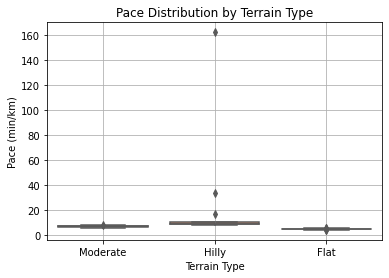

In [9]:
# Visualize pace distribution by terrain type
# Explanation: Create boxplot showing how pace varies across terrain types
sns.boxplot(data=df, x='Terrain', y='pace', palette='Set2')
plt.title("Pace Distribution by Terrain Type")
plt.xlabel("Terrain Type")
plt.ylabel("Pace (min/km)")
plt.grid(True)
plt.show()


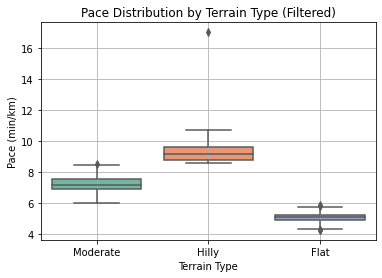

In [10]:
# Filter out extreme outliers in pace (e.g. over 20 min/km)
df_filtered = df[df['pace'] < 20]

# Replot the cleaned data
sns.boxplot(data=df_filtered, x='Terrain', y='pace', palette='Set2')
plt.title("Pace Distribution by Terrain Type (Filtered)")
plt.xlabel("Terrain Type")
plt.ylabel("Pace (min/km)")
plt.grid(True)
plt.show()